In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 워닝 지우기
import warnings
warnings.filterwarnings( 'ignore' )

In [4]:
#for colab # 한글폰트 설치
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [39]:
#for colab
#plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

In [6]:
df = pd.read_csv('esg_after_preprocessing.csv', encoding='utf-8-sig', index_col=0)

In [7]:
df

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,연도,company_id,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded
0,AJ네트웍스,B,D,B,B,2020,0,3.0,1.0,3.0,3.0
1,AJ네트웍스,B,D,B,B,2021,0,3.0,1.0,3.0,3.0
2,AJ네트웍스,B+,C,B+,B+,2022,0,3.5,2.0,3.5,3.5
3,AJ네트웍스,B+,C,B+,B+,2023,0,3.5,2.0,3.5,3.5
4,AK홀딩스,B+,C,B+,B+,2020,1,3.5,2.0,3.5,3.5
...,...,...,...,...,...,...,...,...,...,...,...
3171,흥국화재,B+,C,B+,B+,2023,792,3.5,2.0,3.5,3.5
3172,흥아해운,D,D,C,D,2020,793,1.0,1.0,2.0,1.0
3173,흥아해운,D,D,C,D,2021,793,1.0,1.0,2.0,1.0
3174,흥아해운,C,C,B,C,2022,793,2.0,2.0,3.0,2.0


In [8]:
# 총 780개의 회사의 대략 4년치 esg 데이터
len(df['회사명'].unique())

780

### 중복값 지우기

다음과 같이 연도별 중복값이 있는 경우가 있어서 지워주기

In [9]:
df[df['회사명'] == '미래에셋증권']

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,연도,company_id,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded
1244,미래에셋증권,A,B+,A+,B+,2020,311,4.0,3.5,4.5,3.5
1245,미래에셋증권,B+,A,A+,B,2021,311,3.5,4.0,4.5,3.0
1246,미래에셋증권,A,A,A+,B+,2022,311,4.0,4.0,4.5,3.5
1247,미래에셋증권,A,A,A+,B+,2023,311,4.0,4.0,4.5,3.5


In [10]:
df[df['회사명'] == '미원홀딩스']

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,연도,company_id,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded
1256,미원홀딩스,C,C,C,C,2020,314,2.0,2.0,2.0,2.0
1257,미원홀딩스,C,C,C,B,2021,314,2.0,2.0,2.0,3.0
1258,미원홀딩스,C,C,C,B,2022,314,2.0,2.0,2.0,3.0
1259,미원홀딩스,C,C,C,B,2023,314,2.0,2.0,2.0,3.0


In [11]:
df[df.duplicated(['회사명','KCGS_종합등급' ,'연도'], keep=False)]

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,연도,company_id,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded
1043,동원산업,C,B,B+,C,2023,260,2.0,3.0,3.5,2.0
1044,동원산업,C,B,B+,C,2023,270,2.0,3.0,3.5,2.0
1048,동원수산,D,D,D,D,2023,261,1.0,1.0,1.0,1.0
1049,동원수산,D,D,D,D,2023,271,1.0,1.0,1.0,1.0
1053,동원시스템즈,C,B,B+,D,2023,262,2.0,3.0,3.5,1.0
1054,동원시스템즈,C,B,B+,D,2023,272,2.0,3.0,3.5,1.0
1058,동일고무벨트,B,C,B+,B,2023,263,3.0,2.0,3.5,3.0
1059,동일고무벨트,B,C,B+,B,2023,273,3.0,2.0,3.5,3.0
1063,동일산업,C,C,D,B+,2023,264,2.0,2.0,1.0,3.5
1064,동일산업,C,C,D,B+,2023,274,2.0,2.0,1.0,3.5


In [12]:
# 회사명, 종합등급, 연도가 동일한 경우 지워주기
df.drop_duplicates(['회사명','KCGS_종합등급' ,'연도'], inplace=True)

In [13]:
df

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,연도,company_id,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded
0,AJ네트웍스,B,D,B,B,2020,0,3.0,1.0,3.0,3.0
1,AJ네트웍스,B,D,B,B,2021,0,3.0,1.0,3.0,3.0
2,AJ네트웍스,B+,C,B+,B+,2022,0,3.5,2.0,3.5,3.5
3,AJ네트웍스,B+,C,B+,B+,2023,0,3.5,2.0,3.5,3.5
4,AK홀딩스,B+,C,B+,B+,2020,1,3.5,2.0,3.5,3.5
...,...,...,...,...,...,...,...,...,...,...,...
3171,흥국화재,B+,C,B+,B+,2023,792,3.5,2.0,3.5,3.5
3172,흥아해운,D,D,C,D,2020,793,1.0,1.0,2.0,1.0
3173,흥아해운,D,D,C,D,2021,793,1.0,1.0,2.0,1.0
3174,흥아해운,C,C,B,C,2022,793,2.0,2.0,3.0,2.0


In [14]:
# unique 한 값만 가져오기 - 중복되지 않은 회사명 가져오기
companies = df['회사명'].unique()

In [15]:
# 각 회사에서 가장 오래된 esg 점수와 가장 최신의 esg 점수를 조회할 수 있다.
for company in companies:
    company_df = df[df['회사명'] == 'AJ네트웍스']
    print(company_df.iloc[0,:])
    print('-'*30)
    print(company_df.iloc[-1,:])
    break

회사명                  AJ네트웍스
KCGS_종합등급                 B
KCGS_환경                   D
KCGS_사회                   B
KCGS_지배구조                 B
연도                     2020
company_id                0
KCGS_종합등급_encoded       3.0
KCGS_환경_encoded         1.0
KCGS_사회_encoded         3.0
KCGS_지배구조_encoded       3.0
Name: 0, dtype: object
------------------------------
회사명                  AJ네트웍스
KCGS_종합등급                B+
KCGS_환경                   C
KCGS_사회                  B+
KCGS_지배구조                B+
연도                     2023
company_id                0
KCGS_종합등급_encoded       3.5
KCGS_환경_encoded         2.0
KCGS_사회_encoded         3.5
KCGS_지배구조_encoded       3.5
Name: 3, dtype: object


In [16]:
# esg 점수가 좋아졌는지 파악하기
# 최신 종합점수 - 가장 오래된 종합 점수

result_dict = {}

for company in companies:
    company_df = df[df['회사명'] == company]
    old = company_df.iloc[0,:]['KCGS_종합등급_encoded']
    new = company_df.iloc[-1,:]['KCGS_종합등급_encoded']
    result_dict[company] = new - old

In [17]:
result_dict

{'AJ네트웍스': 0.5,
 'AK홀딩스': 0.0,
 'BGF': 0.0,
 'BGF리테일': 0.0,
 'BNK금융지주': -0.5,
 'BYC': -2.0,
 'CJ': -0.5,
 'CJ CGV': -0.5,
 'CJ대한통운': -0.5,
 'CJ씨푸드': 0.0,
 'CJ제일제당': 0.0,
 'CS홀딩스': 0.0,
 'DB': 0.0,
 'DB금융투자': 0.0,
 'DB손해보험': 0.0,
 'DB하이텍': -0.5,
 'DGB금융지주': -0.5,
 'DL': 0.5,
 'DL건설': 1.0,
 'DL이앤씨': 0.0,
 'DN오토모티브': -1.0,
 'DRB동일': -1.0,
 'DSR': -1.0,
 'DSR제강': 0.0,
 'E1': 0.5,
 'F&F 홀딩스': 2.0,
 'GKL': 0.5,
 'GS': 0.5,
 'GS건설': 0.0,
 'GS글로벌': 0.5,
 'GS리테일': 1.0,
 'HDC': -1.5,
 'HDC랩스': -1.0,
 'HDC현대EP': -1.0,
 'HDC현대산업개발': 0.0,
 'HD한국조선해양': 0.0,
 'HD현대': 0.0,
 'HD현대건설기계': 0.0,
 'HD현대에너지솔루션': 0.0,
 'HD현대인프라코어': -0.5,
 'HD현대일렉트릭': -0.5,
 'HD현대중공업': 0.0,
 'HJ중공업': 0.0,
 'HL D&I': 0.0,
 'HLB글로벌': -1.0,
 'HL만도': 0.0,
 'HL홀딩스': 0.0,
 'HMM': 0.0,
 'HSD엔진': -0.5,
 'HS애드': 0.0,
 'JB금융지주': -0.5,
 'JW생명과학': -1.5,
 'JW중외제약': -1.0,
 'JW홀딩스': 0.0,
 'KB금융': 0.0,
 'KC그린홀딩스': -2.0,
 'KC코트렐': -2.0,
 'KEC': -1.0,
 'KG모빌리티': 0.0,
 'KG스틸': -1.0,
 'KG케미칼': 0.0,
 'KH 필룩스': -1.0,
 'KIB플러그에너지': -1.0,
 'KISCO홀딩스'

In [18]:
pd.Series(result_dict.values()).value_counts() # 각각 분포가 어떤지 조회하기 hint: value counts

 0.0    256
-1.0    243
-2.0     86
 0.5     70
-0.5     52
-1.5     29
 1.0     28
 1.5      9
 2.0      3
-2.5      3
 2.5      1
dtype: int64

In [19]:
# df에 새로운 열 추가하기
df['increase_decrease'] = df['회사명'].map(result_dict)

In [20]:
df

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,연도,company_id,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded,increase_decrease
0,AJ네트웍스,B,D,B,B,2020,0,3.0,1.0,3.0,3.0,0.5
1,AJ네트웍스,B,D,B,B,2021,0,3.0,1.0,3.0,3.0,0.5
2,AJ네트웍스,B+,C,B+,B+,2022,0,3.5,2.0,3.5,3.5,0.5
3,AJ네트웍스,B+,C,B+,B+,2023,0,3.5,2.0,3.5,3.5,0.5
4,AK홀딩스,B+,C,B+,B+,2020,1,3.5,2.0,3.5,3.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3171,흥국화재,B+,C,B+,B+,2023,792,3.5,2.0,3.5,3.5,0.5
3172,흥아해운,D,D,C,D,2020,793,1.0,1.0,2.0,1.0,1.0
3173,흥아해운,D,D,C,D,2021,793,1.0,1.0,2.0,1.0,1.0
3174,흥아해운,C,C,B,C,2022,793,2.0,2.0,3.0,2.0,1.0


In [21]:
# 중간 저장
df.to_csv('esg_after_preprocessing2.csv', encoding='utf-8-sig')

# ML

In [22]:
# 분석을 위해 2023년 데이터만 갖고 오기
df_2023 = df[df['연도'] == 2023].reset_index(drop=True)
df_2023

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,연도,company_id,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded,increase_decrease
0,AJ네트웍스,B+,C,B+,B+,2023,0,3.5,2.0,3.5,3.5,0.5
1,AK홀딩스,B+,B,A,B,2023,1,3.5,3.0,4.0,3.0,0.0
2,BGF,B+,A,A+,B,2023,2,3.5,4.0,4.5,3.0,0.0
3,BGF리테일,A,A,A+,A,2023,3,4.0,4.0,4.5,4.0,0.0
4,BNK금융지주,A,A,A,A,2023,4,4.0,4.0,4.0,4.0,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
765,휴니드테크놀러지스,D,D,C,C,2023,789,1.0,1.0,2.0,2.0,-1.0
766,휴비스,B+,B+,A,B+,2023,790,3.5,3.5,4.0,3.5,0.0
767,휴스틸,D,D,D,C,2023,791,1.0,1.0,1.0,2.0,-1.0
768,흥국화재,B+,C,B+,B+,2023,792,3.5,2.0,3.5,3.5,0.5


In [23]:
# 이 중 필요한 열만 갖고오기
df_2023 = df_2023[['회사명', 'KCGS_종합등급_encoded', 'KCGS_환경_encoded', 'KCGS_사회_encoded', 'KCGS_지배구조_encoded', 'increase_decrease']]

### Clustering

In [24]:
df_2023

,회사명,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded,increase_decrease
0,AJ네트웍스,3.5,2.0,3.5,3.5,0.5
1,AK홀딩스,3.5,3.0,4.0,3.0,0.0
2,BGF,3.5,4.0,4.5,3.0,0.0
3,BGF리테일,4.0,4.0,4.5,4.0,0.0
4,BNK금융지주,4.0,4.0,4.0,4.0,-0.5
...,...,...,...,...,...,...
765,휴니드테크놀러지스,1.0,1.0,2.0,2.0,-1.0
766,휴비스,3.5,3.5,4.0,3.5,0.0
767,휴스틸,1.0,1.0,1.0,2.0,-1.0
768,흥국화재,3.5,2.0,3.5,3.5,0.5


In [25]:
data = df_2023.iloc[:,1:]

### 계층적 군집화 실행
총 몇개의 클러스터가 적합한지 파악하기 위해서

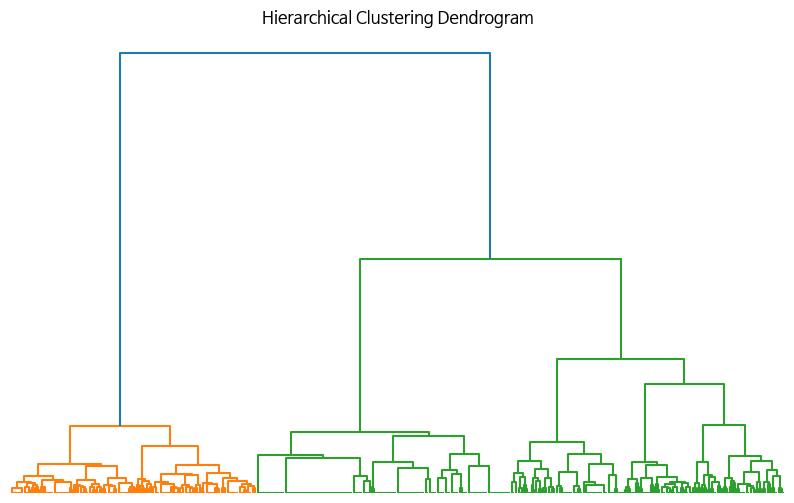

In [26]:
from scipy.cluster.hierarchy import linkage, dendrogram

# 계층적 군집화 수행
linkage_matrix = linkage(data, method='ward')

# 덴드로그램 그리기
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=df_2023['회사명'].values, orientation='top')
plt.title('Hierarchical Clustering Dendrogram')
plt.axis('off')
plt.show()

크게 4개의 클러스터로 나뉘는 걸 알 수 있다

In [27]:
from sklearn.cluster import KMeans

# 클러스터링 수행
kmeans = KMeans(n_clusters=4)  # 클러스터 개수 설정
clusters = kmeans.fit_predict(data)

In [28]:
df_2023['클러스터'] = clusters

# 총 4가지의 군집을 볼 수 있다

In [29]:
df_2023[df_2023['클러스터'] == 0]

,회사명,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded,increase_decrease,클러스터
0,AJ네트웍스,3.5,2.0,3.5,3.5,0.5,0
9,CJ씨푸드,3.0,2.0,3.0,3.0,0.0,0
12,DB,3.0,1.0,3.0,3.5,0.0,0
13,DB금융투자,3.0,2.0,3.0,3.0,0.0,0
15,DB하이텍,3.0,3.0,3.5,3.0,-0.5,0
...,...,...,...,...,...,...,...
747,화성산업,3.0,2.0,3.5,3.0,0.0,0
751,화신,2.0,2.0,4.0,2.0,0.0,0
755,환인제약,3.0,1.0,3.5,3.5,0.0,0
768,흥국화재,3.5,2.0,3.5,3.5,0.5,0


In [30]:
df_2023[df_2023['클러스터'] == 1]

,회사명,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded,increase_decrease,클러스터
5,BYC,1.0,1.0,1.0,1.0,-2.0,1
22,DSR,1.0,1.0,2.0,1.0,-1.0,1
32,HDC랩스,1.0,1.0,1.0,1.0,-1.0,1
44,HLB글로벌,1.0,1.0,2.0,1.0,-1.0,1
55,KC그린홀딩스,1.0,1.0,1.0,2.0,-2.0,1
...,...,...,...,...,...,...,...
752,화인베스틸,1.0,2.0,1.0,1.0,-2.0,1
753,화천기계,1.0,1.0,1.0,1.0,-1.0,1
754,화천기공,1.0,1.0,1.0,2.0,-1.0,1
765,휴니드테크놀러지스,1.0,1.0,2.0,2.0,-1.0,1


In [31]:
df_2023[df_2023['클러스터'] == 2]

,회사명,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded,increase_decrease,클러스터
1,AK홀딩스,3.5,3.0,4.0,3.0,0.0,2
2,BGF,3.5,4.0,4.5,3.0,0.0,2
3,BGF리테일,4.0,4.0,4.5,4.0,0.0,2
4,BNK금융지주,4.0,4.0,4.0,4.0,-0.5,2
6,CJ,3.5,3.5,4.0,3.5,-0.5,2
...,...,...,...,...,...,...,...
761,효성티앤씨,4.0,4.0,4.5,3.5,-0.5,2
762,효성화학,4.0,4.0,4.5,3.5,-0.5,2
763,후성,3.0,3.0,3.5,3.0,1.0,2
764,휠라홀딩스,3.5,3.0,4.0,3.5,0.0,2


In [32]:
df_2023[df_2023['클러스터'] == 3]

,회사명,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded,increase_decrease,클러스터
11,CS홀딩스,2.0,1.0,1.0,3.0,0.0,3
20,DN오토모티브,2.0,2.0,1.0,3.0,-1.0,3
23,DSR제강,2.0,1.0,2.0,3.0,0.0,3
34,HDC현대산업개발,2.0,1.0,2.0,3.0,0.0,3
57,KEC,2.0,2.0,1.0,2.0,-1.0,3
...,...,...,...,...,...,...,...
707,한진중공업홀딩스,2.0,1.0,1.0,3.5,-1.0,3
710,한창제지,2.0,2.0,2.0,3.0,-1.0,3
749,화승인더스트리,2.0,2.0,2.0,3.5,-1.0,3
750,화승코퍼레이션,2.0,2.0,2.0,3.0,-1.5,3


In [33]:
cluster_centers = kmeans.cluster_centers_

In [34]:
cluster_centers

array([[ 2.5620915 ,  2.12091503,  3.35947712,  2.49673203, -0.41176471],
       [ 1.01214575,  1.12550607,  1.33603239,  1.26315789, -1.31174089],
       [ 3.75518672,  3.59128631,  4.06431535,  3.60788382,  0.2033195 ],
       [ 1.96899225,  1.33333333,  1.52713178,  2.75968992, -0.49612403]])

In [35]:
# 반올림하기
cluster_centers_rounded = np.round(cluster_centers, decimals=2)
cluster_centers_rounded

array([[ 2.56,  2.12,  3.36,  2.5 , -0.41],
       [ 1.01,  1.13,  1.34,  1.26, -1.31],
       [ 3.76,  3.59,  4.06,  3.61,  0.2 ],
       [ 1.97,  1.33,  1.53,  2.76, -0.5 ]])

In [36]:
column_names = 'KCGS_종합등급', 'KCGS_환경', 'KCGS_사회', 'KCGS_지배구조', '증감'
cluster_centers_df = pd.DataFrame(cluster_centers, columns=column_names)
cluster_centers_df

,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,증감
0,2.562092,2.120915,3.359477,2.496732,-0.411765
1,1.012146,1.125506,1.336032,1.263158,-1.311741
2,3.755187,3.591286,4.064315,3.607884,0.203320
3,1.968992,1.333333,1.527132,2.759690,-0.496124


In [37]:
# 한글 오류 안 뜨게 하는 코드
import os
import matplotlib.pyplot as plt

if os.name == 'posix':
    plt.rc("font", family="AppleGothic")

else:
    plt.rc("font", family="Malgun Gothic")

# - (마이너스) 안 깨지는 코드
plt.rcParams['axes.unicode_minus'] = False

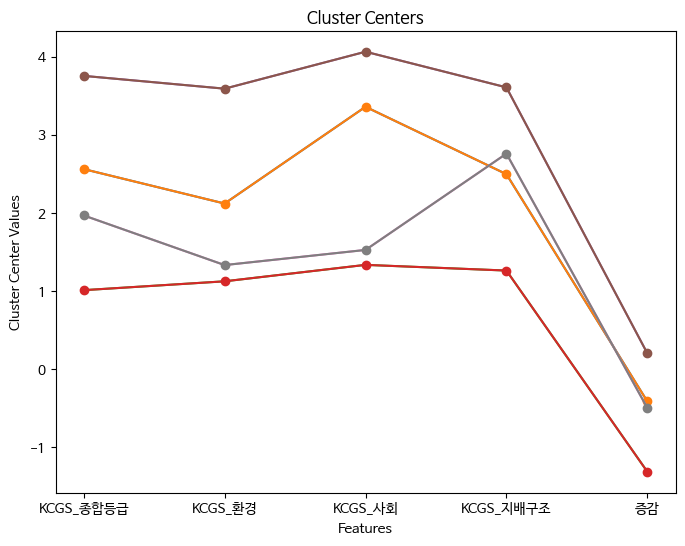

In [40]:
import matplotlib.pyplot as plt

# 점으로 시각화
plt.figure(figsize=(8, 6))
for i in range(len(cluster_centers_df)):
    plt.plot(range(len(cluster_centers_df.columns)), cluster_centers_df.iloc[i])
    plt.plot(range(len(cluster_centers_df.columns)), cluster_centers_df.iloc[i], '-o')
plt.xticks(range(len(cluster_centers_df.columns)), cluster_centers_df.columns)
plt.xlabel('Features')
plt.ylabel('Cluster Center Values')
plt.title('Cluster Centers')
plt.show()